In [1]:
import numpy as np
from scipy.cluster.vq import kmeans
from operator import itemgetter
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

In [2]:
from home_made_k_means import homemade_k_means

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

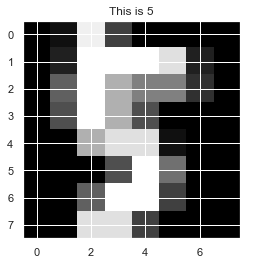

In [4]:
i = 46
plt.imshow(digits.images[i], cmap='gray')
plt.title('This is {}'.format(digits.target[i]))
plt.show()

## TASK 1
Divide the dataset into  𝑘  (let  𝑘 =10 at first) clusters using k-means method that you implemented in previous homework. Assign digit to each clusters according to prevalent digit in the cluster. Show centroids (using imshow) and assigned labels.

In [5]:
from sklearn.cluster import KMeans

In [6]:
from scipy.cluster.vq import kmeans, vq

In [7]:
clusts_ = kmeans(digits.data, 10, 100, 1e-4)

In [8]:
clusts = clusts_[0]

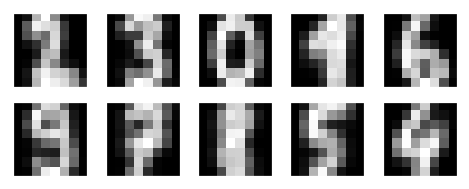

In [9]:
clusts = clusts.reshape(10,8,8)
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
for axi, center in zip(ax.flat, clusts):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap='gray')

Assign digit to each clusters according to prevalent digit in the cluster.

In [10]:
digits.images.shape

(1797, 8, 8)

In [11]:
clusts.shape

(10, 8, 8)

In [12]:
# labels=[]
# def labling_machine(centroids):
#     for idx, centr in enumerate(centroids):
        
#         dis = np.sqrt((np.sum((digits.images[:,np.newaxis] - centr)**2, axis=1)))
#         closest = np.argmin(dis, axis=1)
#         print(closest)
#         labels.append((idx, digits.target[closest]))
#     return labels

In [13]:
def closest_centroid_digits(centroids):
    digitss_ = digits.images.reshape((digits.images.shape[0], -1))
    closest = np.argmin(np.sqrt(
        ((digitss_[:,np.newaxis] - centroids)**2).sum(axis=2)), axis=1)
    return closest

In [14]:
def assign_digits(digs, kk):
    centroids, dist = kmeans(digs, kk)
#     labels = vq(digs, centroids.reshape((centroids.shape[0], -1)))[0]
    labels = closest_centroid_digits(centroids)
    assigned_digits = []
    for k in range(kk):
        assigned_digits.append(
            np.argmax(np.bincount(digits.target[labels == k])))
    
    assgned_labels = np.array(list(map(assigned_digits.__getitem__, labels)))
    return assgned_labels, centroids, assigned_digits

In [15]:
res = assign_digits(digits.images.reshape((digits.images.shape[0], -1)), 10)

In [16]:
labels = res[0]
labels

array([0, 8, 8, ..., 8, 9, 9])

Write a function that calculates error rate (i.e. number of incorrect classified items relative to total number of items), compute error rate for obtained clusters.

In [17]:
plt.style.use('dark_background')

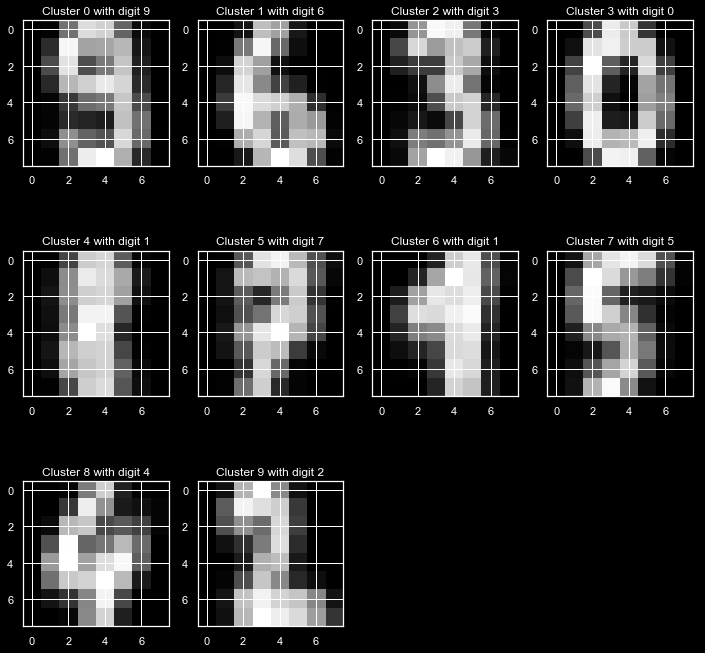

In [18]:
assgned_labels, centroids, assigned_digits = assign_digits(digits.images.reshape((digits.images.shape[0], -1)), 10)
plt.figure(figsize=(12, 12))
for i in range(10):
    plt.subplot(3, 4, i + 1)
    plt.title('Cluster {} with digit {}'.format(i, assigned_digits[i]))
    plt.imshow(centroids[i].reshape((8, 8)), cmap='gray')


In [19]:
def error_rate(labels, targets):
    return np.sum(labels != targets)/labels.shape[0]

In [20]:
error_rate(digits.target, res[0])

0.20979410127991097

In [21]:
for n in range(10):
    mm = (digits.target == n)
    print(n, '->', error_rate(digits.target[mm], res[0][mm]))

0 -> 0.0056179775280898875
1 -> 0.6978021978021978
2 -> 0.1638418079096045
3 -> 0.15300546448087432
4 -> 0.09944751381215469
5 -> 0.25274725274725274
6 -> 0.022099447513812154
7 -> 0.05027932960893855
8 -> 0.42528735632183906
9 -> 0.22777777777777777


Calculate and visualize a confusion matrix ( 𝑎𝑖𝑗 ), where  𝑖  is predicted digit,  𝑗  is true digit,  𝑎𝑖𝑗  is the number of items with predicted digit  𝑖  and true digit  𝑗 . Make conclusions (which digits are confused at most, which are predicted with better accuracy)

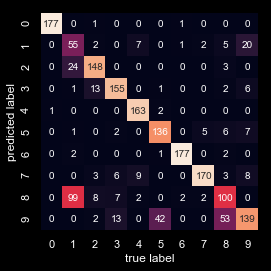

In [22]:
def confusion_matrix(labels, target):
    nums = max(labels.max(), target.max()) + 1
    matrix =  np.array([[np.sum((labels == i) & (target == j)) for j in range(nums)] \
                            for i in range(nums)])
    return matrix, nums
    
matrix, nums = confusion_matrix(digits.target, labels)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Plot a graphic of error rate against number of clusters  𝑘 , vary  𝑘  in some range. Select optimal value of  𝑘 , explain your choice.

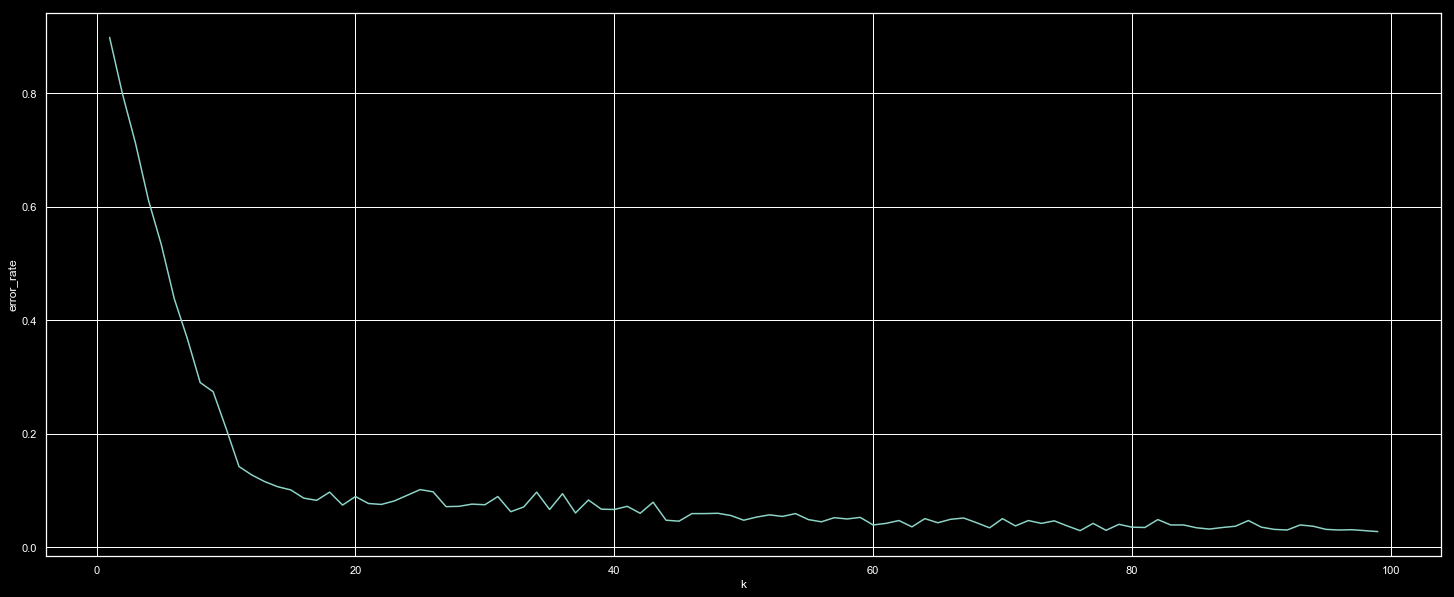

In [23]:
kks = range(1, 100)
digas = digits.images.reshape((digits.images.shape[0], -1))
err_k = [error_rate(assign_digits(digas, k)[0], digits.target) for k in kks]


plt.figure(figsize=(25,10))
plt.xlabel('k')
plt.ylabel('error_rate')
plt.plot(kks,err_k)

Show centroids and prevalent digits for optimal  𝑘 . For which digits there is more than one cluster? For which digits there is exactly one cluster? Visualize a new confusion matrix. Make conclusions.

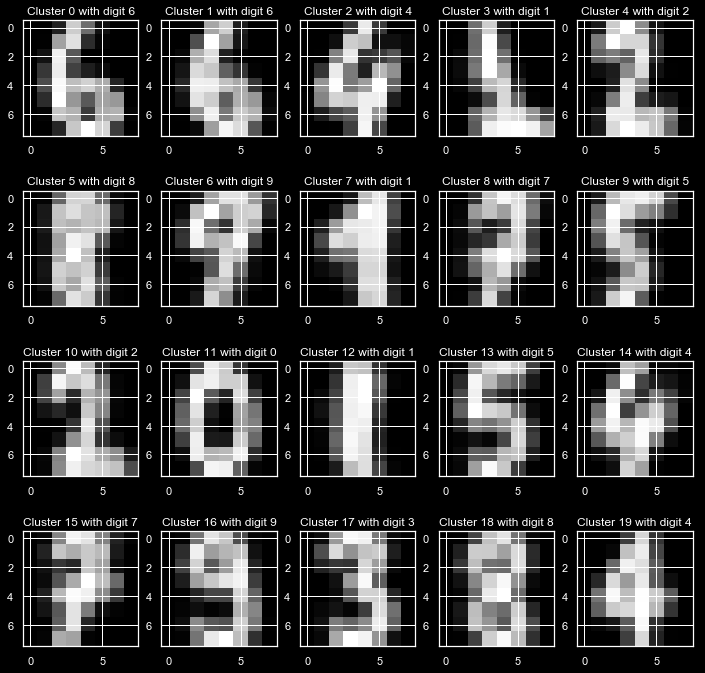

In [24]:
assgned_labels, centroids, assigned_digits = assign_digits(digits.images.reshape((digits.images.shape[0], -1)), 20)
plt.figure(figsize=(12, 12))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.title('Cluster {} with digit {}'.format(i, assigned_digits[i]))
    plt.imshow(centroids[i].reshape((8, 8)), cmap='gray')



In [25]:
res = assign_digits(digits.images.reshape((digits.images.shape[0], -1)), 20)
labels = res[0]

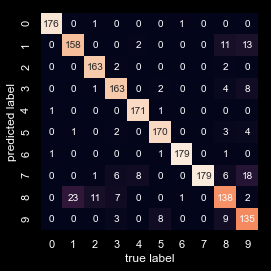

In [26]:
def confusion_matrix(labels, target):
    nums = max(labels.max(), target.max()) + 1
    matrix =  np.array([[np.sum((labels == i) & (target == j)) for j in range(nums)] \
                            for i in range(nums)])
    return matrix, nums
    
matrix, nums = confusion_matrix(digits.target, labels)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');